## import modules

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
sns.set_style("white")

---
## load data

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
target_feature = "Survived"

In [3]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

---
## statistics

In [5]:
train_data.describe().round(2)

PassengerId  Survived  Pclass     Age   SibSp   Parch    Fare
count       891.00    891.00  891.00  714.00  891.00  891.00  891.00
mean        446.00      0.38    2.31   29.70    0.52    0.38   32.20
std         257.35      0.49    0.84   14.53    1.10    0.81   49.69
min           1.00      0.00    1.00    0.42    0.00    0.00    0.00
25%         223.50      0.00    2.00   20.12    0.00    0.00    7.91
50%         446.00      0.00    3.00   28.00    0.00    0.00   14.45
75%         668.50      1.00    3.00   38.00    1.00    0.00   31.00
max         891.00      1.00    3.00   80.00    8.00    6.00  512.33

In [6]:
test_data.describe().round(2)

PassengerId  Pclass     Age   SibSp   Parch    Fare
count       418.00  418.00  332.00  418.00  418.00  417.00
mean       1100.50    2.27   30.27    0.45    0.39   35.63
std         120.81    0.84   14.18    0.90    0.98   55.91
min         892.00    1.00    0.17    0.00    0.00    0.00
25%         996.25    1.00   21.00    0.00    0.00    7.90
50%        1100.50    3.00   27.00    0.00    0.00   14.45
75%        1204.75    3.00   39.00    1.00    0.00   31.50
max        1309.00    3.00   76.00    8.00    9.00  512.33

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


---
## train data: numerical features (+ categorical target feature)

In [9]:
num_feature_names = ["Age", "SibSp", "Parch", "Fare"] + [target_feature]
num_feature_names

['Age', 'SibSp', 'Parch', 'Fare', 'Survived']

In [10]:
train_data_num = train_data[num_feature_names]
train_data_num.shape

(891, 5)

In [11]:
train_data_num.head()

Age  SibSp  Parch     Fare  Survived
0  22.0      1      0   7.2500         0
1  38.0      1      0  71.2833         1
2  26.0      0      0   7.9250         1
3  35.0      1      0  53.1000         1
4  35.0      0      0   8.0500         0

---
## train data: histograms of numerical features

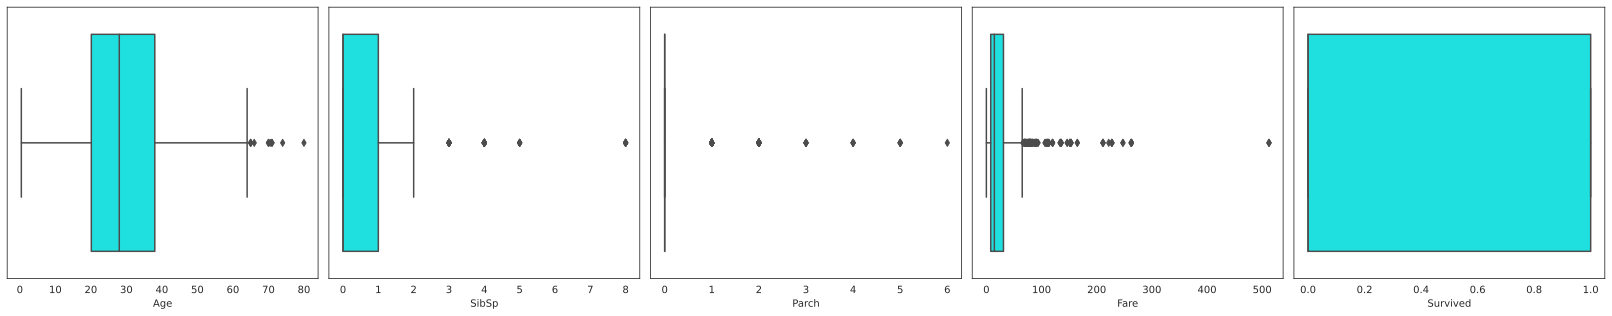

In [12]:
fig, axs = plt.subplots(1, len(num_feature_names), figsize=(4.5*len(num_feature_names), 4.5))

for i, num_feature_name in enumerate(num_feature_names):
    sns.boxplot(x=num_feature_name, data=train_data_num, ax=axs[i], color="cyan")
fig.tight_layout()
plt.show()

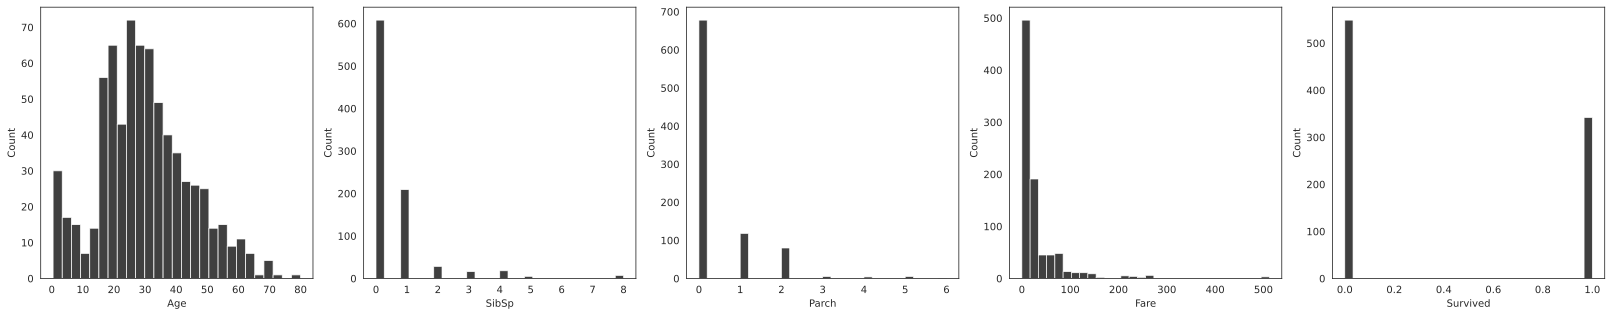

In [13]:
fig, axs = plt.subplots(1, len(num_feature_names), figsize=(4.5*len(num_feature_names), 4.5))

for i, num_feature_name in enumerate(num_feature_names):
    sns.histplot(data=train_data_num[num_feature_name], ax=axs[i], bins="sqrt", color="k")
fig.tight_layout()
plt.show()

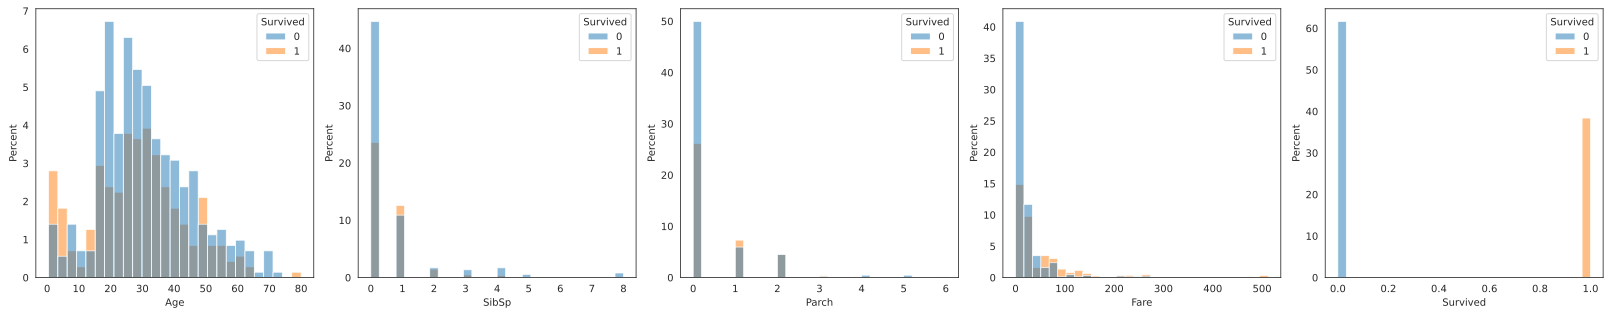

In [14]:
fig, axs = plt.subplots(1, len(num_feature_names), figsize=(4.5*len(num_feature_names), 4.5))

for i, num_feature_name in enumerate(num_feature_names):
    sns.histplot(x=num_feature_name, data=train_data_num, hue="Survived", ax=axs[i], stat="percent", bins="sqrt", color="k")
fig.tight_layout()
plt.show()

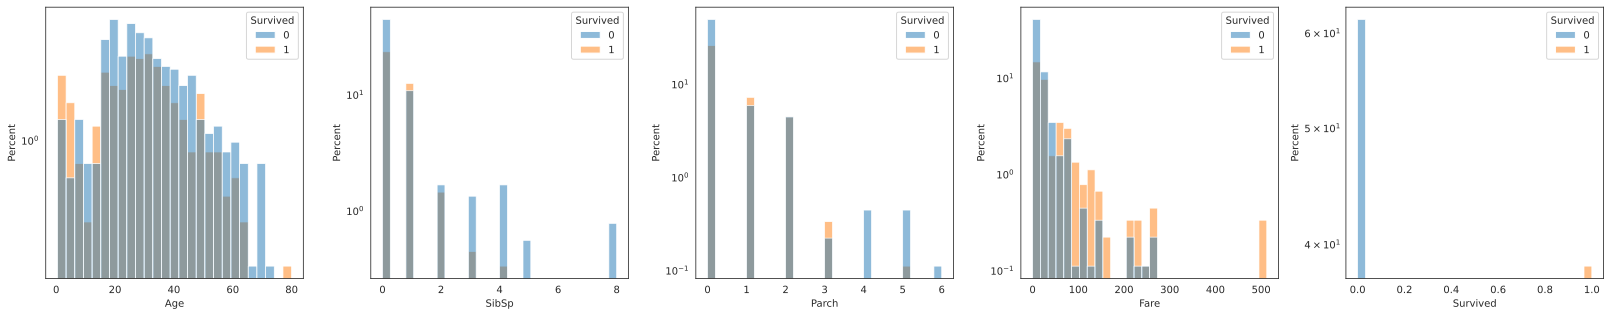

In [15]:
fig, axs = plt.subplots(1, len(num_feature_names), figsize=(4.5*len(num_feature_names), 4.5))

for i, num_feature_name in enumerate(num_feature_names):
    sns.histplot(x=num_feature_name, data=train_data_num, hue="Survived", ax=axs[i], stat="percent", bins="sqrt", color="k")
    axs[i].set_yscale("log")
fig.tight_layout()
plt.show()

---
## train data: correlation

1. Person
2. Spearman

In [16]:
methods = ["pearson", "spearman"]
corrs = [train_data_num.corr(method).abs() for method in methods]

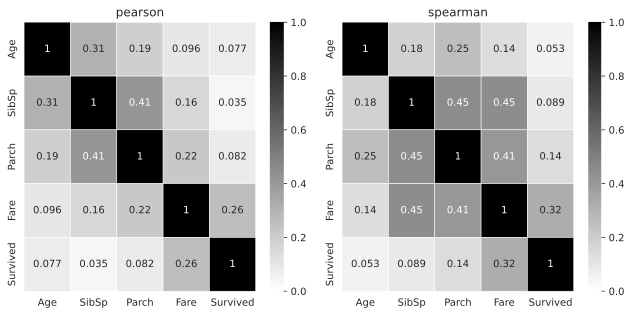

In [17]:
fig, axs = plt.subplots(1, len(methods), figsize=(4.5*len(methods), 4.5))

for i, method in enumerate(methods):
    sns.heatmap(corrs[i], vmin=0, vmax=1, cmap="binary", annot=True, linewidths=0.5, ax=axs[i])
    axs[i].set_title(method)
fig.tight_layout()
plt.show()

In [18]:
corrs[1][["Survived"]].sort_values(by="Survived", ascending=False)

Survived
Survived  1.000000
Fare      0.323736
Parch     0.138266
SibSp     0.088879
Age       0.052565

---
## pivot tabelle

In [19]:
pd.pivot_table(train_data_num, index="Survived", values = num_feature_names, aggfunc=["mean"]).round(2)

mean                   
            Age   Fare Parch SibSp
Survived                          
0         30.63  22.12  0.33  0.55
1         28.34  48.40  0.46  0.47

---
## train data: categorical features

In [20]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
cat_feature_names = ["Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked", target_feature]
cat_feature_names

['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Survived']

In [22]:
train_data_cat = train_data[cat_feature_names]

In [23]:
train_data_cat.head()

Pclass                                               Name     Sex  \
0       3                            Braund, Mr. Owen Harris    male   
1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2       3                             Heikkinen, Miss. Laina  female   
3       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4       3                           Allen, Mr. William Henry    male   

             Ticket Cabin Embarked  Survived  
0         A/5 21171   NaN        S         0  
1          PC 17599   C85        C         1  
2  STON/O2. 3101282   NaN        S         1  
3            113803  C123        S         1  
4            373450   NaN        S         0

---
## train data: count plots

In [24]:
fig, axs = plt.subplots(1, len(train_data_cat.columns), figsize=(4.5*len(train_data_cat.columns), 4.5), sharey=True)

for i, col in enumerate(train_data_cat.columns):
    sns.countplot(x=col, data=train_data_cat, ax=axs[i], zorder=10)
    axs[i].grid(color="k", alpha=0.25, linewidth=0.25, zorder=0)
fig.tight_layout()
plt.show()

In [25]:
fig, axs = plt.subplots(1, len(train_data_cat.columns), figsize=(4.5*len(train_data_cat.columns), 4.5), sharey=True)

for i, col in enumerate(train_data_cat.columns):
    sns.countplot(x=col, hue="Survived", data=train_data_cat, ax=axs[i], zorder=10)
    axs[i].grid(color="k", alpha=0.25, linewidth=0.25, zorder=0)
fig.tight_layout()
plt.show()

In [26]:
train_data_cat.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [27]:
train_data_cat.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [28]:
train_data_cat.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object